In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv(r"C:\Users\VighneshSrinivasaBal\Downloads\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv")

In [6]:
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
Country                             96 non-null object
Year                                96 non-null int64
Life expectancy at birth (years)    96 non-null float64
GDP                                 96 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [8]:
print(data.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.881067e+12
std       4.633971                         10.672882  5.198321e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.735000e+11
50%    2007.500000                         76.750000  1.280000e+12
75%    2011.250000                         78.900000  4.067500e+12
max    2015.000000                         81.000000  1.810000e+13


In [11]:
data = data.rename({"Life expectancy at birth (years)":"Life_Span"},axis = "columns")
print(data.head())

  Country  Year  Life_Span           GDP
0   Chile  2000       77.3  7.786093e+10
1   Chile  2001       77.3  7.097992e+10
2   Chile  2002       77.8  6.973681e+10
3   Chile  2003       77.9  7.564346e+10
4   Chile  2004       78.0  9.921039e+10


In [13]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [14]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


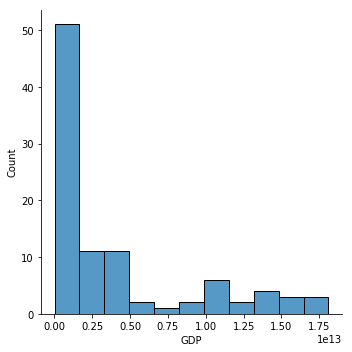

In [18]:
sns.displot(data.GDP,kde=False)

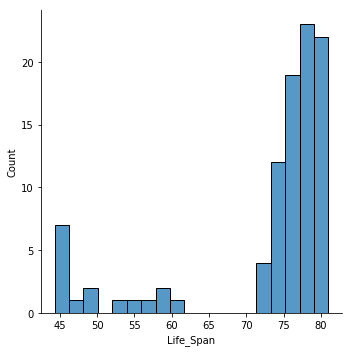

In [19]:
sns.displot(data.Life_Span)

In [21]:
china = data[data.Country=="China"]

In [22]:
print(china.head())

   Country  Year  Life_Span           GDP
16   China  2000       71.7  1.210000e+12
17   China  2001       72.2  1.340000e+12
18   China  2002       72.7  1.470000e+12
19   China  2003       73.1  1.660000e+12
20   China  2004       73.5  1.960000e+12


In [28]:
gk = data.groupby('Country')

In [30]:
print(gk.first())

                          Year  Life_Span           GDP
Country                                                
Chile                     2000       77.3  7.786093e+10
China                     2000       71.7  1.210000e+12
Germany                   2000       78.0  1.950000e+12
Mexico                    2000       74.8  6.840000e+11
United States of America  2000       76.8  1.030000e+13
Zimbabwe                  2000       46.0  6.689958e+09


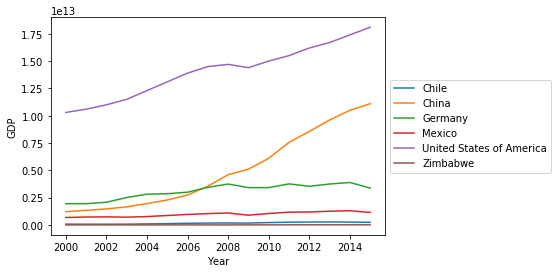

In [32]:
sns.lineplot(x=data.Year,y=data.GDP,hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

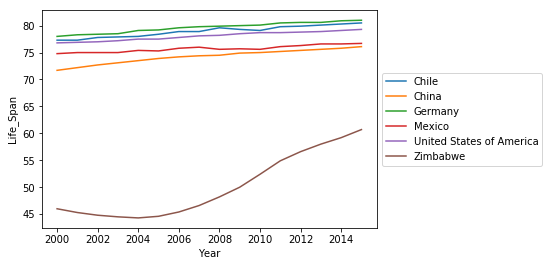

In [33]:
sns.lineplot(x=data.Year,y=data.Life_Span,hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

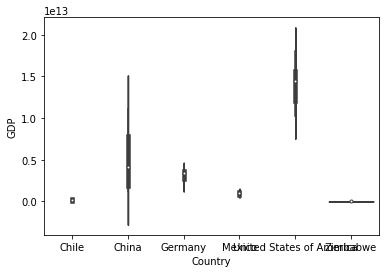

In [34]:
sns.violinplot(x=data.Country,y=data.GDP)

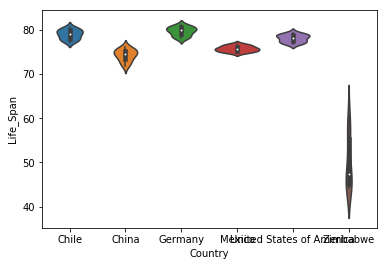

In [37]:
sns.violinplot(x=data.Country,y=data.Life_Span)

C:\Users\VighneshSrinivasaBal\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\VighneshSrinivasaBal\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\VighneshSrinivasaBal\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


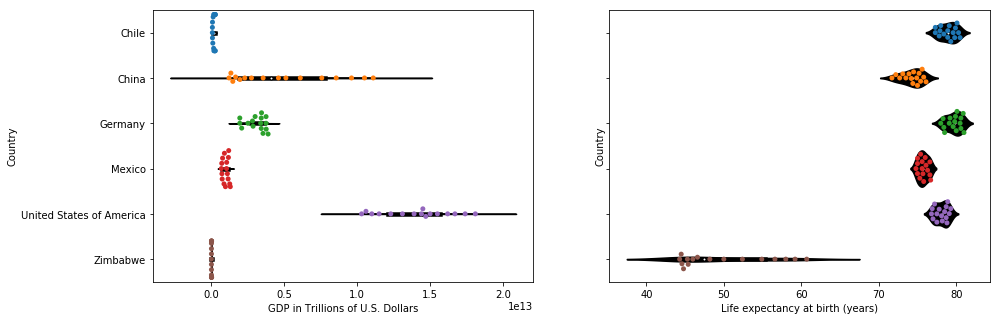

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=data.GDP, y=data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=data.Life_Span, y=data.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=data.Life_Span, y=data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

In [41]:
dfmeans = data.drop("Year",axis = 1).groupby("Country").mean().reset_index()

In [42]:
print(dfmeans.head())

                    Country  Life_Span           GDP
0                     Chile   78.94375  1.698395e+11
1                     China   74.26250  4.961250e+12
2                   Germany   79.65625  3.095000e+12
3                    Mexico   75.71875  9.762500e+11
4  United States of America   78.06250  1.407500e+13


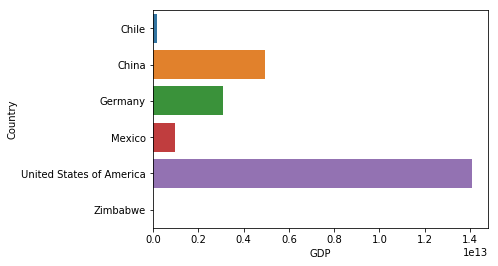

In [45]:
sns.barplot(y= "Country", x = "GDP", data= dfmeans)

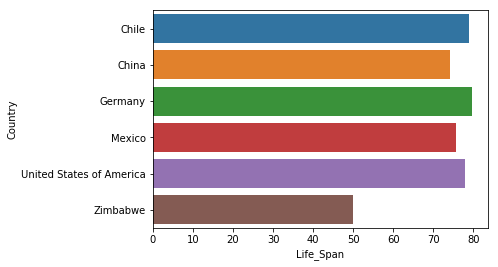

In [46]:
sns.barplot(x="Life_Span",y = "Country",data=dfmeans)

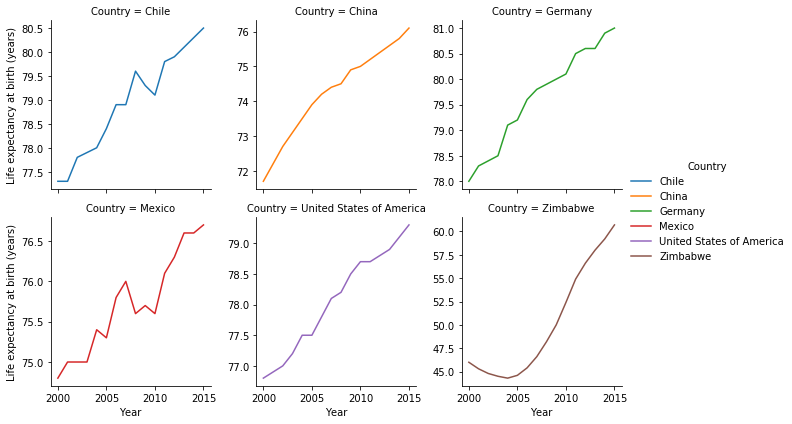

In [47]:
graphLEABY = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","Life_Span")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

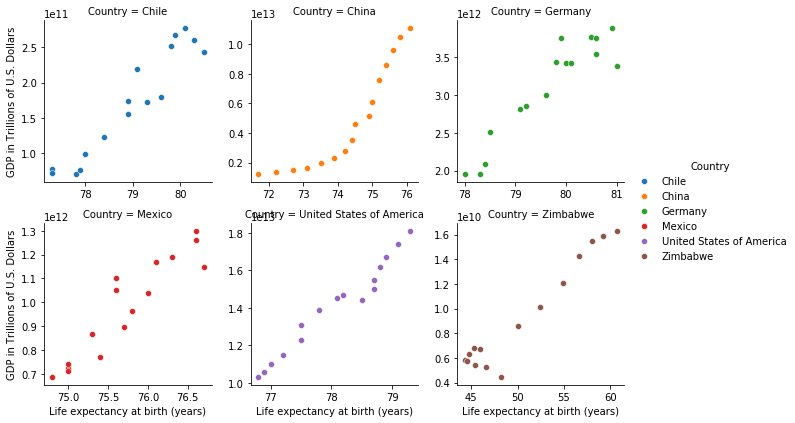

In [48]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_Span", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions:

Has life expectancy increased over time in the six nations?
Yes with Zimbabwe having the greatest increase.
Has GDP increased over time in the six nations?
GDP has also increased for all countries in our list, especially for China.
Is there a correlation between GDP and life expectancy of a country?
Yes there is a positive correlation between GDP and life expectancy for countries in our list.
What is the average life expectancy in these nations?
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
What is the distribution of that life expectancy?
the life expectancy had a left skew, or most of the observations were on the right side.